# Code Playground for Percept Data



<b> Data is required to converted into the BIDS-standard. </b>




## 0. Loading packages and functions, defining paths



In [147]:
# Importing Python and external packages
import os
import sys
import importlib
import json
from dataclasses import dataclass, field, fields
from itertools import compress
import csv
import pandas as pd
import numpy as np

import sklearn as sk
import scipy
import matplotlib.pyplot as plt
from scipy import signal

#mne
import mne_bids
import mne

In [ ]:
# additionally imported from Varvara
# from importlib import reload          # is this necessary?

# from scipy.signal import spectrogram, hanning     # is this necessary?

# from mne.time_frequency import tfr_morlet         # is this necessary?

In [ ]:
# check some package versions for documentation and reproducability
print('Python sys', sys.version)
print('pandas', pd.__version__)
print('numpy', np.__version__)
print('mne_bids', mne_bids.__version__)
print('mne', mne.__version__)
print('sci-py', scipy.__version__)
print('sci-kit learn', sk.__version__)

In [148]:
filepath = '/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU/sub021_ses-2021080602000195_run-BrainSense20210806020700.mat'
# define local storage directories

# check working directory
print(os.getcwd())

# get folder above a certain folder
print(os.path.dirname(os.getcwd()))

# change working directory to project-code folder
os.chdir('/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU/')


/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU
/Users/jenniferbehnke/Coding/Perceive_output


## Pre-Work - Getting into the Files

In [149]:
# import file as MNE object
# saved in variable data as RawArray

data = mne.io.read_raw_fieldtrip(
    filepath,
    info={},
    data_name='data',
)
data.info

/Applications/MNE-Python/.mne-python/lib/python3.10/site-packages/pymatreader/utils.py:230: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


Creating RawArray with float64 data, n_channels=6, n_times=3688
    Range : 0 ... 3687 =      0.000 ...    14.748 secs
Ready.


/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/1849242608.py:4: RuntimeWarning: The supplied FieldTrip structure does not have an elec or grad field. No channel locations will extracted and the kind of channel might be inaccurate.
  data = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/1849242608.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13. Making it a MISC channel.
  data = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/1849242608.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_R_02. Making it a MISC channel.
  data = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/ipykernel_905/1849242608.py:4: RuntimeWarning: Cannot guess the correct type of channel LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms. Making it a MISC channel.
  data = mne.io.read_raw_fieldtrip(
/var/folders/d4/z737wy2x2y309dsbbzk9y8yr0000gn/T/i

<Info | 8 non-empty values
 bads: []
 ch_names: LFP_Stn_L_13, LFP_Stn_R_02, ...
 chs: 4 misc, 2 Stimulus
 custom_ref_applied: False
 dig: 0 items
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>

In [ ]:
# load raw-mat file into python
# saved in variable dat as a dict with variable names as keys and loaded matrices as values

dat = scipy.io.loadmat(filepath)

In [150]:
print(data) #here you can see the number of samples and the time

print(data.info) #ch_names, chs, nchan, sfreq.

<RawArray | 6 x 3688 (14.7 s), ~184 kB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: LFP_Stn_L_13, LFP_Stn_R_02, ...
 chs: 4 misc, 2 Stimulus
 custom_ref_applied: False
 dig: 0 items
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
>


In [151]:
data.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [152]:
# create a dictionary of data

data_as_dict = vars(data)
print(data_as_dict.keys())

dict_keys(['_data', 'preload', '_last_samps', '_first_samps', 'info', 'buffer_size_sec', '_cals', '_raw_extras', '_read_picks', '_read_comp_grade', '_comp', '_filenames', 'orig_format', '_orig_units', '_projectors', '_projector', '_dtype_', '_annotations', '_cropped_samp', '_init_kwargs'])


In [153]:
# print(data._data[2,:])

data_data = data.get_data()
print(data_data.shape)

(6, 3688)


In [154]:
# define variables for data.label from Matlab
ch_names = data.ch_names
n_chan = len(ch_names) 

# make a list and array of channel names
chNamesList = data.info['ch_names']
chNamesArr = np.array(chNamesList)

print(ch_names) # equivalent to data.label from Matlab
print(n_chan)

['LFP_Stn_L_13', 'LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us']
6


In [155]:
# define variabels for data.time from Matlab
n_time_samps = data.n_times #nsamples
time_secs = data.times #timepoints set to zero

# make a list and array of timepoints
# chTimeList = [time_secs]
# chTimeArr = np.array(chTimeList)

print(n_time_samps) 
print(time_secs) 


3688
[0.0000e+00 4.0000e-03 8.0000e-03 ... 1.4740e+01 1.4744e+01 1.4748e+01]


In [169]:
# define variable for data.trial from Matlab
ch_trials = data._data

# make a list and array of channel trials
chTrialsList = [ch_trials]
# chTrialsArr = np.array(chTrialsList)

print(ch_trials)

[[ -4.44034504  -3.64336003  -4.44034504 ...  10.9300801    9.67767509
   10.3608051 ]
 [ -5.80660505  -6.26202506  -3.30179503 ...   7.85599507   8.31141508
    7.74214007]
 [482.         482.         482.         ...          nan          nan
           nan]
 [587.         587.         587.         ...          nan          nan
           nan]
 [  0.           0.           0.         ...          nan          nan
           nan]
 [  0.           0.           0.         ...          nan          nan
           nan]]


In [164]:
# create dictionary with ch_names as keys : ch_trials as values

mydict = {
    'Time' : list(time_secs), 
    str(ch_names[0]) : list(ch_trials[0]),
    str(ch_names[1]) : list(ch_trials[1]),
    str(ch_names[2]) : list(ch_trials[2]),
    str(ch_names[3]) : list(ch_trials[3]),
    str(ch_names[4]) : list(ch_trials[4]),
    str(ch_names[5]) : list(ch_trials[5])
}


In [174]:
# write dictionary to a csv file and store it in the current folder
# output time_secs komischerweise gerundet, warum?
# use filepath instead of full path

df = pd.DataFrame.from_dict(mydict)
df.to_csv('/Users/jenniferbehnke/Coding/Perceive_output/ieeg_ses-2021080602000195_3MFU/mydict.csv', index=False, header=True)

## Plot data

### Matplotlib Playground

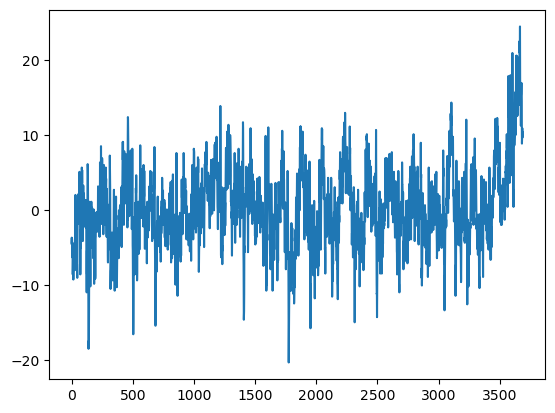

In [190]:
# plotting first row of data.trial from Matlab

plt.plot(ch_trials[0])
plt.show()


[[-4.44034504 -3.64336003 -4.44034504 ... 10.9300801   9.67767509
  10.3608051 ]]


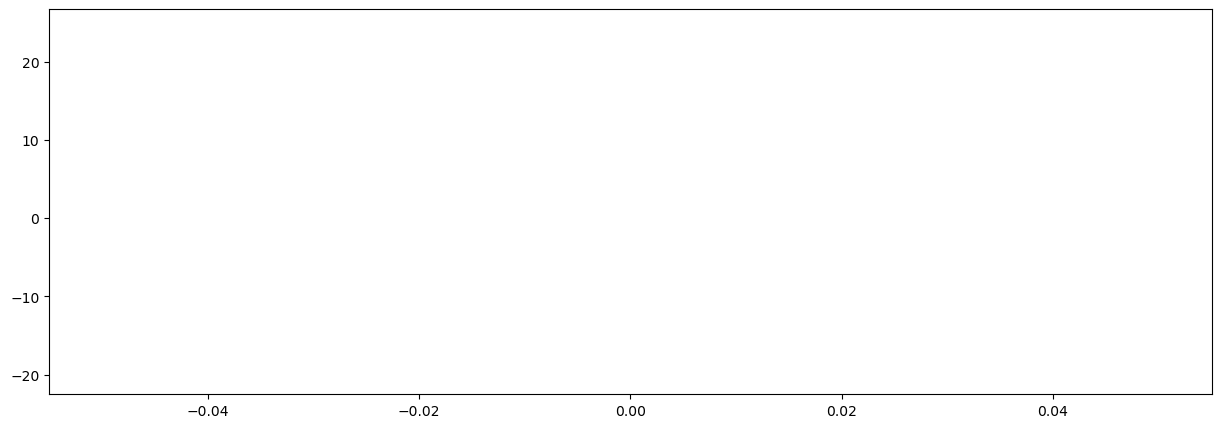

In [191]:
mydat = data.get_data(picks='LFP_Stn_L_13') # saving row 1 from data.trial
print(mydat)

fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(mydat)
plt.show()

### Make some nice plots of the data

In [ ]:
#channels to plot:
chs_to_plot = [ 
    'LFP_R_13_PEAK76',
    'LFP_R_13_STN',
    'STIM_R_125Hz_60'
]


In [ ]:
# time to plot
plot_times = time_secs # time set to zero 

## Code from Varvara

In [ ]:
#Make some nice plots of the data

#channels to plot:
chs_to_plot = [ 
    'LFP_R_13_PEAK76',
    'LFP_R_13_STN',
    'STIM_R_125Hz_60'
]

plot_times = data.times #time
xticks = np.linspace(0, plot_times[-1], 5) #make 5 x-axis ticks, dividing the seconds by 5

fig, axes = plt.subplots(
    1, len(chs_to_plot), figsize=(18, 6)
) #define n of subplots and size

# axes = axes.flatten()
ax_c = 0

for i, name in enumerate(chNamesList):

    
    if name in chs_to_plot:

        if name[-3:] == 'STN':
            axes[ax_c].psd(raw_data[i, :])
            axes[ax_c].set_title(
                f'PSD {name}',
                fontsize=16, color='r'
            )

        else:
            
            axes[ax_c].plot(plot_times, raw_data[i, :])
            axes[ax_c].set_title(name, fontsize=16, color='r')
            axes[ax_c].set_xticks(xticks)
            axes[ax_c].set_xticklabels(np.around(xticks / 60, 1))
                
        ax_c += 1
        
        
# chNamesArr == ch_to_plot

In [ ]:
a = 55.5

In [ ]:
(f'channel1 {name}, #{a}'
 ' because ut was too long')

In [ ]:
chNamesList.index(chs_to_plot)

In [ ]:
data.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 0, tmax = 20, dB = False, estimate = 'amplitude')
data.plot_psd(fmin = 5, fmax = 50, picks = 1, tmin = 60, tmax = 80,  dB = False, estimate = 'amplitude')

In [ ]:
print(type(data._data))
print(data._data.shape)
scan_durn = data._data.shape[1] / data.info['sfreq']
print('Duration of LFP recording = ', scan_durn, 's, or', scan_durn / 60, 'min.')
print(data._data[1, :])

chan = 1 # set channel we want
start_time = int((1000 / 1000) * data.info['sfreq'])
end_time   = int((10000 / 1000) * data.info['sfreq'])
data._data[chan, start_time:end_time]

In [ ]:
mydat = data.get_data(picks=['LFP_Stn_L_13'], start=1, stop=201)
print(mydat.shape)

In [ ]:
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(data.get_data(picks='STIM_R_125Hz_60us',start=1, stop=20000).T)
plt.show()

In [ ]:
#%matplotlib inline
data.plot(data.get_data(picks='LFP_Stn_L_13'))

In [ ]:
#Pick only channel one and two
data.info['bads'] = ['LFP_Stn_L_13','LFP_Stn_R_02', 'LFP_Stn_L_13_PEAK15Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK15Hz_THR20-30_AVG3000ms', 'STIM_L_125Hz_60us', 'STIM_R_125Hz_60us'] 
picks = mne.pick_types(data.info, meg='mag', eeg=False, eog=False,
                       stim=False, exclude='bads')

In [ ]:
#events = mne.find_events(raw, stim_channel='LFP_R_13_STN')
trial_onsets = np.array([
       [ 1000 ,      0 ,    1],
       [ 15000 ,      0 ,    2 ]]) #we need the samples
event_dict = {'NoStim':1,'Threshold':2}
fig = mne.viz.plot_events(trial_onsets, sfreq=data.info['sfreq'], first_samp=data.first_samp)
epochs = mne.Epochs(data,events=trial_onsets,event_id = event_dict, tmin=0, tmax=10, baseline = None, preload = True)
epochs.plot_image(picks = 0)

In [ ]:
nostim_ep = epochs['NoStim']
stim_ep = epochs['Threshold']
stim_ep.plot_image(picks = 1)

In [ ]:
M = 200
NFFT = M
win = hanning(M)
overlap = 0.25
overlap_samples = int(round(M*overlap)) # overlap in samples
t, f, S = spectrogram(mydat,window=win,nperseg=M,noverlap=overlap_samples,nfft=NFFT)

# Compute average spectrum
avg_S = np.mean(S,axis=1)

In [ ]:
vars(tfr_morlet)

In [ ]:
freqs = np.arange(1, 125)
D = tfr_morlet(epochs, freqs=freqs, n_cycles=6, return_itc=False, average=True, picks = 1)

In [ ]:
spectrogram(
    mydat,
    fs=125.0, 
#             window=('hanning', 0.25), 
    nperseg=1, noverlap=0.25, nfft=None, detrend='constant', 
                         return_onesided=True, scaling='density', axis=- 1, mode='psd')

In [ ]:
raw = data.filter(l_freq=90, h_freq=5, picks=[0,1])

In [ ]:
#epochs.plot_psd(fmin=5, fmax=90)
D.plot(fmin=5, fmax=40, picks = 1)

In [ ]:
D.plot(mode='zlogratio', picks = 0, baseline=None,
#        vmin = -3, vmax = 8,
       cmap='viridis',
)

In [ ]:
# matplotlib
D.plot(events = trial_onsets, start = 80, duration = 7, n_channels = 1)